<a href="https://colab.research.google.com/github/Lorenzopiloto/Statistics-DS/blob/main/Introdu%C3%A7%C3%A3o_An%C3%A1lise_de_Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Análise de Texto

## Módulos

- Instalações

In [1]:
! sudo pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


- Carregamento

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [3]:
import re
from unicodedata import normalize
import unidecode
import string

In [4]:
from spacy.lang.pt.stop_words import STOP_WORDS

# Carregar Dados

In [6]:
dados_cptm = pd.read_csv('dados_cptm.csv', encoding = 'latin1')

In [7]:
dados_cptm

,created,id,texto_do_twitter,screenName,polaridade,data_ajustada
0,2017-02-28T18:20:24Z,836687521182547968,@CPTM_oficial 20 min q estou esperando um trem...,_richardbatista,-1,2017-02-28
1,2017-02-28T18:20:13Z,836687476483731456,[18h20] CPTM: Linha 11 - Coral: Velocidade Red...,transitoagoraSP,-1,2017-02-28
2,2017-02-28T18:20:13Z,836687475984613376,[18h20] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-28
3,2017-02-28T18:20:13Z,836687475468713984,[18h20] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-28
4,2017-02-28T18:09:15Z,836684713209257984,@_lcoliveira2016 @UsuariosMetroSP @CPTM_oficia...,Lik001,-1,2017-02-28
...,...,...,...,...,...,...
8465,2017-02-17T09:59:28Z,832575188168372224,[10h59] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-17
8466,2017-02-17T09:59:27Z,832575187589615616,[10h59] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-17
8467,2017-02-17T09:39:26Z,832570147516747776,[10h39] CPTM: Linha 11 - Coral: Operação Norma...,transitoagoraSP,1,2017-02-17
8468,2017-02-17T09:32:42Z,832568453659840513,Ao embarcar ou desembarcar na CPTM tenha muito...,UsuariosMetroSP,0,2017-02-17


In [8]:
dados_cptm.dtypes

,0
created,object
id,int64
texto_do_twitter,object
screenName,object
polaridade,int64
data_ajustada,object


# Pré-Processamento

## Funções Importantes

In [9]:
# retirar url's
url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')

In [10]:
# pontuacao
punc_re = re.compile('[%s]' % re.escape(string.punctuation))

In [11]:
# numeros
num_re = re.compile('(\\d+)')

In [12]:
# alfa numericos
alpha_num_re = re.compile("^[a-z0-9_.]+$")

In [13]:
# mencoes
mention_re = re.compile('@(\w+)')

## Ajustes

- Deixar minúsculo

In [14]:
texto_ajustado = dados_cptm['texto_do_twitter'].apply(lambda x: x.lower())
texto_ajustado

,texto_do_twitter
0,@cptm_oficial 20 min q estou esperando um trem...
1,[18h20] cptm: linha 11 - coral: velocidade red...
2,[18h20] cptm: linha 9 - esmeralda: operação no...
3,[18h20] cptm: linha 7 - rubi: velocidade reduz...
4,@_lcoliveira2016 @usuariosmetrosp @cptm_oficia...
...,...
8465,[10h59] cptm: linha 9 - esmeralda: operação no...
8466,[10h59] cptm: linha 7 - rubi: velocidade reduz...
8467,[10h39] cptm: linha 11 - coral: operação norma...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Limpar url´s

In [15]:
texto_ajustado[texto_ajustado.str.contains('http')]

,texto_do_twitter
9,18h - obras alteram circulação dos trens duran...
10,18h - obras alteram circulação dos trens duran...
11,18h - obras alteram circulação dos trens duran...
12,18h - obras alteram circulação dos trens duran...
13,18h - obras alteram circulação dos trens duran...
...,...
8447,problemas nas linhas de trens e metro. saiba c...
8454,rt @cptm_oficial: #dicacultural olhares sobre ...
8457,#dicacultural olhares sobre os trilhos\n\n#vej...
8463,vontadinha de bater cabelo na cptm https://t.c...


In [16]:
texto_ajustado[texto_ajustado.str.contains('http')].apply(lambda x: url_re.sub(' ', x))

,texto_do_twitter
9,18h - obras alteram circulação dos trens duran...
10,18h - obras alteram circulação dos trens duran...
11,18h - obras alteram circulação dos trens duran...
12,18h - obras alteram circulação dos trens duran...
13,18h - obras alteram circulação dos trens duran...
...,...
8447,problemas nas linhas de trens e metro. saiba c...
8454,rt @cptm_oficial: #dicacultural olhares sobre ...
8457,#dicacultural olhares sobre os trilhos\n\n#vej...
8463,vontadinha de bater cabelo na cptm


In [17]:
texto_ajustado = texto_ajustado.apply(lambda x: url_re.sub(' ', x))

- Ajustar menções com @

In [18]:
texto_ajustado = texto_ajustado.apply(lambda x: mention_re.sub(' ', x))
texto_ajustado

,texto_do_twitter
0,20 min q estou esperando um trem pra luz na ...
1,[18h20] cptm: linha 11 - coral: velocidade red...
2,[18h20] cptm: linha 9 - esmeralda: operação no...
3,[18h20] cptm: linha 7 - rubi: velocidade reduz...
4,durante a semana eles ñ reprimem o comér...
...,...
8465,[10h59] cptm: linha 9 - esmeralda: operação no...
8466,[10h59] cptm: linha 7 - rubi: velocidade reduz...
8467,[10h39] cptm: linha 11 - coral: operação norma...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Ajustar Pontuações (*Punctuations marks*)

In [19]:
texto_ajustado = texto_ajustado.apply(lambda x: punc_re.sub(' ', x))
texto_ajustado

,texto_do_twitter
0,20 min q estou esperando um trem pra luz na ...
1,18h20 cptm linha 11 coral velocidade red...
2,18h20 cptm linha 9 esmeralda operação no...
3,18h20 cptm linha 7 rubi velocidade reduz...
4,durante a semana eles ñ reprimem o comér...
...,...
8465,10h59 cptm linha 9 esmeralda operação no...
8466,10h59 cptm linha 7 rubi velocidade reduz...
8467,10h39 cptm linha 11 coral operação norma...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Limpar numeração

In [20]:
texto_ajustado = texto_ajustado.apply(lambda x: num_re.sub(' ', x))
texto_ajustado

,texto_do_twitter
0,min q estou esperando um trem pra luz na b...
1,h cptm linha coral velocidade reduzi...
2,h cptm linha esmeralda operação norm...
3,h cptm linha rubi velocidade reduzid...
4,durante a semana eles ñ reprimem o comér...
...,...
8465,h cptm linha esmeralda operação norm...
8466,h cptm linha rubi velocidade reduzid...
8467,h cptm linha coral operação normal ...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Ajustar acentos

In [21]:
texto_ajustado = texto_ajustado.apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))
texto_ajustado

,texto_do_twitter
0,min q estou esperando um trem pra luz na b...
1,h cptm linha coral velocidade reduzi...
2,h cptm linha esmeralda operacao norm...
3,h cptm linha rubi velocidade reduzid...
4,durante a semana eles n reprimem o comer...
...,...
8465,h cptm linha esmeralda operacao norm...
8466,h cptm linha rubi velocidade reduzid...
8467,h cptm linha coral operacao normal ...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Limpar textos alfa numericos e palavras menores que 3 caracteres

In [22]:
def preprocessamento_texto(texto, n):
  '''Ajustar caracteres alfa numéricos e palavras menores que n
     texto: texto a ser ajustado
     n: tamanho mínimo das palavras'''
  list_pos = 0
  cleaned_str = ''
  for word in texto.split():
      if list_pos == 0:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = word
          else:
              cleaned_str = ' '
      else:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = cleaned_str + ' ' + word
          else:
              cleaned_str += ' '
      list_pos += 1
  return cleaned_str

In [23]:
texto_ajustado = texto_ajustado.apply(lambda x: preprocessamento_texto(x, 3))
texto_ajustado

,texto_do_twitter
0,estou esperando trem nada absurdo
1,cptm linha coral velocidade reduzida linha s...
2,cptm linha esmeralda operacao normal linha t...
3,cptm linha rubi velocidade reduzida linha di...
4,durante semana eles reprimem comercio irreg...
...,...
8465,cptm linha esmeralda operacao normal linha t...
8466,cptm linha rubi velocidade reduzida linha di...
8467,cptm linha coral operacao normal linha safir...
8468,embarcar desembarcar cptm tenha muito cuid...


- Ajustar palavras muito usadas (*Stopwords*)

In [24]:
def remove_stops(texto):
    # expects a string
    stops = set(STOP_WORDS)
    list_pos = 0
    cleaned_str = ''
    text = texto.split()
    for word in text:
        if word not in stops:
            # rebuild cleaned_str
            if list_pos == 0:
                cleaned_str = word
            else:
                cleaned_str = cleaned_str + ' ' + word
            list_pos += 1
    return cleaned_str

In [25]:
list(STOP_WORDS)[0:15]

['nessa',
 'posso',
 'irá',
 'deve',
 'naquela',
 'toda',
 'dezassete',
 'poderá',
 'fazes',
 'as',
 'meses',
 'cinco',
 'tentaram',
 'iniciar',
 'tentar']

In [27]:
STOP_WORDS.update({'cptm'})

In [28]:
texto_ajustado = texto_ajustado.apply(lambda x: remove_stops(x))
texto_ajustado

,texto_do_twitter
0,esperando trem absurdo
1,linha coral velocidade reduzida linha safira v...
2,linha esmeralda operacao normal linha turquesa...
3,linha rubi velocidade reduzida linha diamante ...
4,durante semana reprimem comercio irregular que...
...,...
8465,linha esmeralda operacao normal linha turquesa...
8466,linha rubi velocidade reduzida linha diamante ...
8467,linha coral operacao normal linha safira opera...
8468,embarcar desembarcar tenha cuidado altura trem...


- Gravar as mudanças no dataframe

In [29]:
dados_cptm['texto_twitter_ajustado'] = texto_ajustado

In [30]:
dados_cptm

,created,id,texto_do_twitter,screenName,polaridade,data_ajustada,texto_twitter_ajustado
0,2017-02-28T18:20:24Z,836687521182547968,@CPTM_oficial 20 min q estou esperando um trem...,_richardbatista,-1,2017-02-28,esperando trem absurdo
1,2017-02-28T18:20:13Z,836687476483731456,[18h20] CPTM: Linha 11 - Coral: Velocidade Red...,transitoagoraSP,-1,2017-02-28,linha coral velocidade reduzida linha safira v...
2,2017-02-28T18:20:13Z,836687475984613376,[18h20] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-28,linha esmeralda operacao normal linha turquesa...
3,2017-02-28T18:20:13Z,836687475468713984,[18h20] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-28,linha rubi velocidade reduzida linha diamante ...
4,2017-02-28T18:09:15Z,836684713209257984,@_lcoliveira2016 @UsuariosMetroSP @CPTM_oficia...,Lik001,-1,2017-02-28,durante semana reprimem comercio irregular que...
...,...,...,...,...,...,...,...
8465,2017-02-17T09:59:28Z,832575188168372224,[10h59] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-17,linha esmeralda operacao normal linha turquesa...
8466,2017-02-17T09:59:27Z,832575187589615616,[10h59] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-17,linha rubi velocidade reduzida linha diamante ...
8467,2017-02-17T09:39:26Z,832570147516747776,[10h39] CPTM: Linha 11 - Coral: Operação Norma...,transitoagoraSP,1,2017-02-17,linha coral operacao normal linha safira opera...
8468,2017-02-17T09:32:42Z,832568453659840513,Ao embarcar ou desembarcar na CPTM tenha muito...,UsuariosMetroSP,0,2017-02-17,embarcar desembarcar tenha cuidado altura trem...


# Nuvem de Palavras

Fonte: https://amueller.github.io/word_cloud/index.html

In [31]:
# combinar as linhas em texto inteiro
texto_completo = " ".join(s for s in dados_cptm['texto_twitter_ajustado'])
texto_completo

'esperando trem absurdo linha coral velocidade reduzida linha safira velocidade reduzida transitosp linha esmeralda operacao normal linha turquesa operacao normal transitosp linha rubi velocidade reduzida linha diamante velocidade reduzida transitosp durante semana reprimem comercio irregular queria fizessem feriado nota linha coral velocidade reduzida linha safira velocidade reduzida transitosp linha esmeralda operacao normal linha turquesa operacao normal transitosp linha rubi velocidade reduzida linha diamante velocidade reduzida transitosp obras alteram circulacao trens durante carnaval infos obras alteram circulacao trens durante carnaval infos obras alteram circulacao trens durante carnaval infos obras alteram circulacao trens durante carnaval infos obras alteram circulacao trens durante carnaval infos obras alteram circulacao trens durante carnaval infos obras alteram circulacao trens durante carnaval infos nota apuracaosp desbloqueia hoje transporte bike liberado trens metro bo

- Nuvem simples

In [32]:
wc = WordCloud()
#wc = WordCloud(max_font_size=40, background_color='white')
wc.generate(texto_completo)

(-0.5, 399.5, 199.5, -0.5)

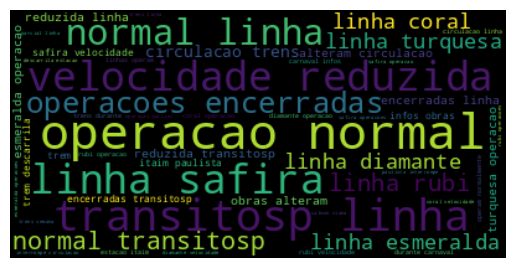

In [33]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plot_path = 'cptm_wordcloud.png'
#plt.savefig(plot_path,  bbox_inches='tight', dpi = 100)

- Nuvem com formato

In [35]:
trem_formato = np.array(Image.open('trem.png'))

(-0.5, 715.5, 361.5, -0.5)

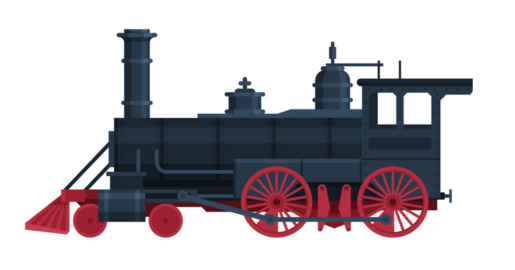

In [36]:
plt.figure()
plt.imshow(trem_formato, interpolation='bilinear')
plt.axis("off")

In [37]:
wc = WordCloud(background_color='white', mask=trem_formato)

In [38]:
wc.generate(texto_completo)

In [39]:
wc.to_file("trem.png")

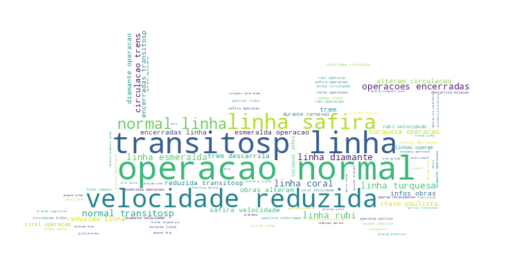

In [40]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plot_path = 'trem_cptm_wordcloud.png'
plt.savefig(plot_path,  bbox_inches='tight', dpi = 300)